In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df = df.drop(['ID', 'ZIP Code'], axis='columns')

In [5]:
x = df.iloc[:,:]
x = x.drop('Personal Loan', axis='columns')
y = df['Personal Loan']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(x,columns=x.columns)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [9]:
gnb.score(x_train,y_train)

0.8815

In [10]:
predict = gnb.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict)
print(accuracy)

0.894


(-2.5, 228.5, -0.5, 10.5)

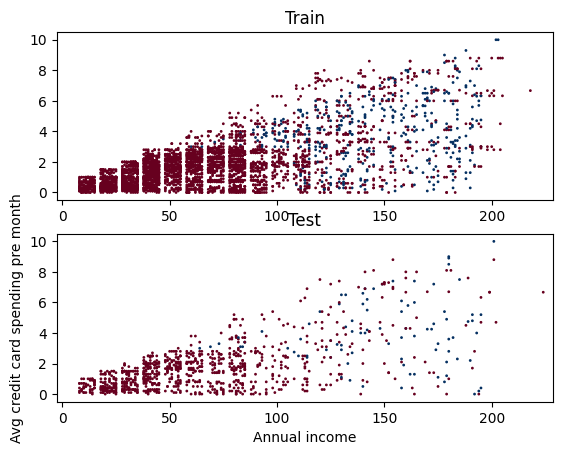

In [12]:
plt.subplot(2,1,1)
plt.scatter(x_train.iloc[:, 2], x_train.iloc[:, 4], c=y_train, s=1, cmap='RdBu')
plt.title("Train")
lim = plt.axis()

plt.subplot(2,1,2)
plt.scatter(x_test.iloc[:, 2], x_test.iloc[:, 4], c=y_test, s=1, cmap='RdBu')
plt.title("Test")
plt.xlabel('Annual income')
plt.ylabel('Avg credit card spending pre month')
plt.axis(lim)


(-2.8000000000000007, 234.8, -31.75, 666.75)

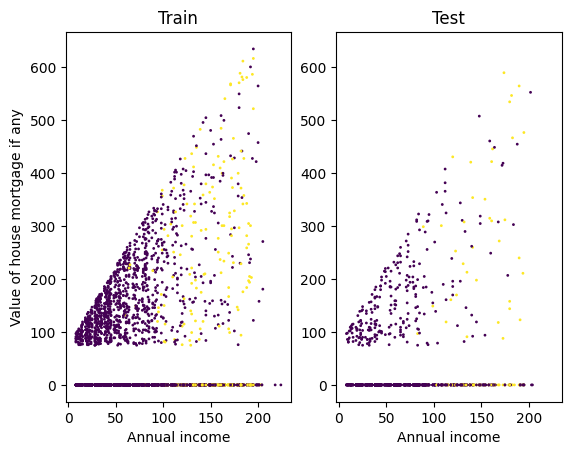

In [55]:
plt.subplot(1,2,1)
plt.scatter(x_train.iloc[:, 2], x_train.iloc[:, 6], c=y_train, s=1)
plt.title("Train")
plt.xlabel('Annual income')
plt.ylabel('Value of house mortgage if any')
lim = plt.axis()

plt.subplot(1,2,2)
plt.scatter(x_test.iloc[:, 2], x_test.iloc[:, 6], c=y_test, s=1)
plt.title("Test")
plt.xlabel('Annual income')
plt.axis(lim)